In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Descomposicion en Valores Singulares (SVD)
$$A_{n\times d} = U_{n\times n} \Sigma_{n\times d} V^t_{d \times d}$$

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
caras=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [7]:
fetch_lfw_people?

Signature:
fetch_lfw_people(
    *,
    data_home=None,
    funneled=True,
    resize=0.5,
    min_faces_per_person=0,
    color=False,
    slice_=(slice(70, 195, None), slice(78, 172, None)),
    download_if_missing=True,
    return_X_y=False,
)
Docstring:
Load the Labeled Faces in the Wild (LFW) people dataset (classification).

Download it if necessary.

=================   =======================
Classes                                5749
Samples total                         13233
Dimensionality                         5828
Features            real, between 0 and 255
=================   =======================

Read more in the :ref:`User Guide <labeled_faces_in_the_wild_dataset>`.

Parameters
----------
data_home : str, default=None
    Specify another download and cache folder for the datasets. By default
    all scikit-learn data is stored in '~/scikit_learn_data' subfolders.

funneled : bool, default=True
    Download and use the funneled variant of the dataset.

resize : flo

In [5]:
caras

{'data': array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
          22.666666],
        [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
           9.333333],
        [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
          25.666666],
        ...,
        [ 77.333336,  90.333336,  93.333336, ..., 233.66667 , 234.33333 ,
         230.66667 ],
        [ 87.666664,  71.666664,  63.333332, ...,  96.      ,  92.333336,
          96.333336],
        [ 91.      ,  90.666664,  94.666664, ...,  40.333332,  42.333332,
          42.333332]], dtype=float32),
 'images': array([[[ 57.       ,  60.333332 ,  78.       , ...,  40.666668 ,
           36.666668 ,  34.       ],
         [ 52.666668 ,  60.       ,  92.       , ...,  46.666668 ,
           36.       ,  30.       ],
         [ 46.       ,  66.       , 113.333336 , ...,  51.       ,
           43.333332 ,  37.666668 ],
         ...,
         [ 61.       ,  62.666668 ,  62.333332 , .

In [6]:
caras.images=caras.images[:10]
caras.target=caras.target[:10]
caras.target_names[caras.target]

array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
       'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
       'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
      dtype='<U25')

In [8]:
caras.images.shape

(10, 87, 65)

In [9]:
caras.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

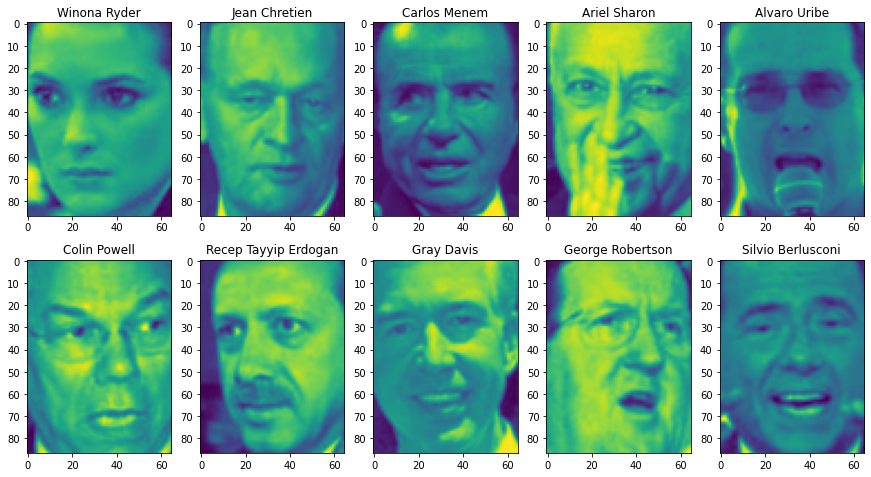

In [13]:
fig, axes=plt.subplots(2,5,figsize=(15,8))
for nombre,imagen,ax in zip(caras.target,caras.images,axes.ravel()):
    ax.imshow(imagen)
    ax.set_title(caras.target_names[nombre]);

In [14]:
from scipy.linalg import svd

In [15]:
svd?

Signature:
svd(
    a,
    full_matrices=True,
    compute_uv=True,
    overwrite_a=False,
    check_finite=True,
    lapack_driver='gesdd',
)
Docstring:
Singular Value Decomposition.

Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
a 1-D array ``s`` of singular values (real, non-negative) such that
``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
main diagonal ``s``.

Parameters
----------
a : (M, N) array_like
    Matrix to decompose.
full_matrices : bool, optional
    If True (default), `U` and `Vh` are of shape ``(M, M)``, ``(N, N)``.
    If False, the shapes are ``(M, K)`` and ``(K, N)``, where
    ``K = min(M, N)``.
compute_uv : bool, optional
    Whether to compute also ``U`` and ``Vh`` in addition to ``s``.
    Default is True.
overwrite_a : bool, optional
    Whether to overwrite `a`; may improve performance.
    Default is False.
check_finite : bool, optional
    Whether to check that the input matrix contains only finite nu

In [25]:
U,Sigma,V=svd(caras.images[0],)

In [18]:
U.shape

(87, 87)

In [19]:
V.shape

(65, 65)

In [26]:
Sigma.shape

(65,)

In [27]:
S=np.zeros((U.shape[0],V.shape[0]))
S[:V.shape[0],:V.shape[0]]=np.diag(Sigma)

In [29]:
S.shape

(87, 65)

In [30]:
U@S@V

array([[ 57.00024573,  60.33346487,  78.00047711, ...,  40.66696319,
         36.66713076,  34.00043662],
       [ 52.66682278,  60.00035664,  92.00063114, ...,  46.66706083,
         36.00029487,  30.00019982],
       [ 46.00016026,  66.00021451, 113.33320227, ...,  51.00017761,
         43.33352897,  37.66688413],
       ...,
       [ 61.00004236,  62.66693075,  62.33346194, ...,  19.00005339,
         18.33337343,  18.66683295],
       [ 62.66674741,  64.66687496,  67.00002338, ...,  17.33347437,
         18.00013983,  22.33342853],
       [ 65.33341511,  68.00005166,  67.00004318, ...,  17.33348497,
         16.66678818,  22.66664418]])

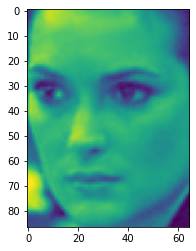

In [33]:
plt.imshow(U@S@V)

In [35]:
def bytes(*arrays):
    return sum(map(lambda a: a.nbytes,arrays))/1024

In [36]:
bytes(caras.images[0])

22.08984375

In [37]:
bytes(U,S,V)

90.25

In [38]:
from sklearn.decomposition import TruncatedSVD

In [39]:
print(TruncatedSVD.__doc__)

Dimensionality reduction using truncated SVD (aka LSA).

    This transformer performs linear dimensionality reduction by means of
    truncated singular value decomposition (SVD). Contrary to PCA, this
    estimator does not center the data before computing the singular value
    decomposition. This means it can work with sparse matrices
    efficiently.

    In particular, truncated SVD works on term count/tf-idf matrices as
    returned by the vectorizers in :mod:`sklearn.feature_extraction.text`. In
    that context, it is known as latent semantic analysis (LSA).

    This estimator supports two algorithms: a fast randomized SVD solver, and
    a "naive" algorithm that uses ARPACK as an eigensolver on `X * X.T` or
    `X.T * X`, whichever is more efficient.

    Read more in the :ref:`User Guide <LSA>`.

    Parameters
    ----------
    n_components : int, default=2
        Desired dimensionality of output data.
        Must be strictly less than the number of features.
        Th

In [40]:
descomposicion=TruncatedSVD(n_components=4)
descomposicion.fit(caras.data)

TruncatedSVD(n_components=4)

In [41]:
caras_svd=descomposicion.transform(caras.data)

In [42]:
caras_svd

array([[10726.508  ,  1065.2478 ,   232.38286,   206.13481],
       [ 9862.763  ,  1341.5388 ,  -718.2989 , -1258.7169 ],
       [ 7280.413  ,  -786.8934 ,   219.35425, -1327.6575 ],
       ...,
       [ 9609.1045 ,  -505.42606,  -324.21326,   249.6763 ],
       [10831.848  ,   865.08795,    69.67496,   428.574  ],
       [ 9738.138  ,  -423.15186,  -994.8909 , -1180.7145 ]],
      dtype=float32)

In [43]:
descomposicion.components_

array([[ 0.00833082,  0.00851637,  0.00880186, ...,  0.01117123,
         0.01073673,  0.01036337],
       [ 0.01251989,  0.01217936,  0.01208529, ..., -0.02314159,
        -0.02211043, -0.02076625],
       [ 0.0271737 ,  0.02729846,  0.02776129, ...,  0.02195618,
         0.02073819,  0.01972268],
       [-0.01093429, -0.01246568, -0.01404717, ...,  0.02783074,
         0.02755923,  0.02748674]], dtype=float32)

In [44]:
descomposicion.components_.shape

(4, 5655)

In [45]:
87*65

5655

In [46]:
descomposicion.explained_variance_ratio_

array([0.20412494, 0.12020302, 0.07318226, 0.06473072], dtype=float32)

In [47]:
descomposicion.explained_variance_ratio_.cumsum()

array([0.20412494, 0.32432795, 0.3975102 , 0.46224093], dtype=float32)

In [48]:
descomposicion.singular_values_

array([548625.3  ,  58167.37 ,  45400.297,  42684.652], dtype=float32)